# Population change, by county, 1990-2020

#### Import Python tools

In [27]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [28]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_stiles as altstiles
import numpy as np

In [29]:
alt.themes.register("stiles", altstiles.theme)
alt.themes.enable("stiles")

ThemeRegistry.enable('grid')

In [30]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [31]:
today = pd.to_datetime("today").strftime("%Y-%m-%d")

---

## Read data

#### Decennial population data from U.S. Census years 2000, 2010, 2020 (processed in `00-decennial-data-2000-2020-api`)

In [32]:
df = pd.read_csv(
    "data/processed/decennial_census_county_pop_1990-00-10-20.csv",
    dtype={"state_fips": "str", "county_fips": "str", "year": "str"},
)

In [33]:
df.head()

,state_fips,county_fips,year,county_name,state_name,ap_name,population
0,01,001,2000,Autauga County,Alabama,Ala.,43671
1,01,003,2000,Baldwin County,Alabama,Ala.,140415
2,01,005,2000,Barbour County,Alabama,Ala.,29038
3,01,007,2000,Bibb County,Alabama,Ala.,20826
4,01,009,2000,Blount County,Alabama,Ala.,51024


---

#### Try it wide

In [34]:
df_wide = (
    df.pivot_table(
        columns="year",
        index=["state_fips", "county_fips", "county_name", "state_name", "ap_name"],
        values="population",
    )
    .reset_index()
    .dropna()
)

In [35]:
len(df_wide)

3122

In [36]:
df_wide.head()

year,state_fips,county_fips,county_name,state_name,ap_name,1990,2000,2010,2020
0,01,001,Autauga County,Alabama,Ala.,34222.0,43671.0,54571.0,58805.0
1,01,003,Baldwin County,Alabama,Ala.,98280.0,140415.0,182265.0,231767.0
2,01,005,Barbour County,Alabama,Ala.,25417.0,29038.0,27457.0,25223.0
3,01,007,Bibb County,Alabama,Ala.,16576.0,20826.0,22915.0,22293.0
4,01,009,Blount County,Alabama,Ala.,39248.0,51024.0,57322.0,59134.0


#### Calculate change

In [37]:
df_wide["change_1990_2020"] = (
    ((df_wide["2020"] - df_wide["1990"]) / df_wide["1990"]) * 100
).round(2)

In [38]:
df_wide["change_2000_2020"] = (
    ((df_wide["2020"] - df_wide["2000"]) / df_wide["2000"]) * 100
).round(2)

In [39]:
df_wide["change_2010_2020"] = (
    ((df_wide["2020"] - df_wide["2010"]) / df_wide["2010"]) * 100
).round(2)

#### Sort the frame by fastest growing places over the two decades

In [40]:
df_wide = df_wide.sort_values("change_1990_2020", ascending=False)

#### Top 20 counties were in these states

In [41]:
df_wide.head(20)["state_name"].unique()

array(['Colorado', 'Georgia', 'Virginia', 'Texas', 'South Dakota',
       'Florida', 'Utah', 'Arizona', 'Idaho', 'Iowa'], dtype=object)

#### Places where population increased the most?

In [42]:
df_wide.head()

year,state_fips,county_fips,county_name,state_name,ap_name,1990,2000,2010,2020,change_1990_2020,change_2000_2020,change_2010_2020
272,08,035,Douglas County,Colorado,Colo.,60391.0,175766.0,285465.0,357978.0,492.77,103.67,25.40
455,13,117,Forsyth County,Georgia,Ga.,44083.0,98407.0,175511.0,251283.0,470.02,155.35,43.17
2890,51,107,Loudoun County,Virginia,Va.,86129.0,169599.0,312311.0,420959.0,388.75,148.21,34.79
2787,48,491,Williamson County,Texas,Texas,139551.0,249967.0,422679.0,609017.0,336.41,143.64,44.08
2420,46,083,Lincoln County,South Dakota,S.D.,15427.0,24131.0,44828.0,65161.0,322.38,170.03,45.36


#### ... and declined the most?

In [44]:
df_wide.tail()

year,state_fips,county_fips,county_name,state_name,ap_name,1990,2000,2010,2020,change_1990_2020,change_2000_2020,change_2010_2020
1767,32,009,Esmeralda County,Nevada,Nev.,1344.0,971.0,783.0,729.0,-45.76,-24.92,-6.90
3036,54,047,McDowell County,West Virginia,W.Va.,35233.0,27329.0,22113.0,19111.0,-45.76,-30.07,-13.58
2763,48,443,Terrell County,Texas,Texas,1410.0,1081.0,984.0,760.0,-46.10,-29.69,-22.76
1479,28,125,Sharkey County,Mississippi,Miss.,7066.0,6580.0,4916.0,3800.0,-46.22,-42.25,-22.70
607,17,003,Alexander County,Illinois,Ill.,10626.0,9590.0,8238.0,5240.0,-50.69,-45.36,-36.39


#### Need a FIPS code before we merge

In [45]:
df_wide["fips"] = df_wide["state_fips"] + df_wide["county_fips"]

In [46]:
len(df_wide)

3122

---

## Geography

#### Counties map file

In [47]:
counties_gdf = gpd.read_file("data/raw/usa_counties_esri_simple.json")

<AxesSubplot:>

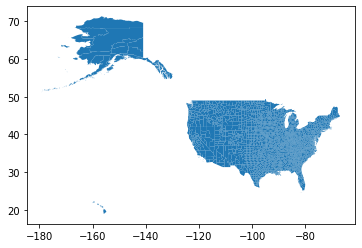

In [48]:
counties_gdf.plot()

In [49]:
counties_gdf.head(1)

,fid,name,state_name,state_fips,cnty_fips,fips,population,pop_sqmi,pop2010,pop10_sqmi,white,black,ameri_es,asian,hawn_pi,hispanic,other,mult_race,males,females,age_under5,age_5_9,age_10_14,age_15_19,age_20_24,age_25_34,age_35_44,age_45_54,age_55_64,age_65_74,age_75_84,age_85_up,med_age,med_age_m,med_age_f,households,ave_hh_sz,hsehld_1_m,hsehld_1_f,marhh_chd,marhh_no_c,mhh_child,fhh_child,families,ave_fam_sz,hse_units,vacant,owner_occ,renter_occ,no_farms12,ave_size12,crop_acr12,ave_sale12,sqmi,no_farms17,ave_size17,crop_acr17,ave_sale17,shape_leng,shape_length,shape_area,geometry
0,1,Autauga County,Alabama,01,001,01001,58224,96.3,54571,90.3,42855,9643,232,474,32,1310,466,869,26569,28002,3579,3991,4290,4290,3080,6487,8243,8205,5860,4013,1982,551,36.9,35.9,37.8,20221,2.68,2012,2429,5522,5845,558,1821,15064,3.13,22135,1914,15248,4973,389,287,41293,50929,604.37,371,305,36890,57844,2.066033,2.066033,0.150256,"POLYGON ((-86.41312 32.70739, -86.43964 32.708..."


#### Merge counties geo file with population trends

In [55]:
gdf = gpd.GeoDataFrame(
    pd.merge(
        df_wide[
            [
                "county_name",
                "ap_name",
                "1990",
                "2000",
                "2010",
                "2020",
                "change_1990_2020",
                "change_2000_2020",
                "change_2010_2020",
                "fips",
            ]
        ],
        counties_gdf[["geometry", "fips"]],
        on="fips",
    )
)

In [56]:
gdf.rename(
    columns={"1990": "pop90", "2000": "pop00", "2010": "pop10", "2020": "pop20"},
    inplace=True,
)

In [61]:
gdf.head(25)

,county_name,ap_name,pop90,pop00,pop10,pop20,change_1990_2020,change_2000_2020,change_2010_2020,fips,geometry
0,Douglas County,Colo.,60391.0,175766.0,285465.0,357978.0,492.77,103.67,25.40,08035,"POLYGON ((-104.66064 39.56592, -105.04875 39.5..."
1,Forsyth County,Ga.,44083.0,98407.0,175511.0,251283.0,470.02,155.35,43.17,13117,"POLYGON ((-83.95708 34.33402, -84.25808 34.335..."
2,Loudoun County,Va.,86129.0,169599.0,312311.0,420959.0,388.75,148.21,34.79,51107,"POLYGON ((-77.45881 39.22028, -77.45764 39.224..."
3,Williamson County,Texas,139551.0,249967.0,422679.0,609017.0,336.41,143.64,44.08,48491,"POLYGON ((-97.31549 30.75237, -97.62406 30.870..."
4,Lincoln County,S.D.,15427.0,24131.0,44828.0,65161.0,322.38,170.03,45.36,46083,"POLYGON ((-96.59920 43.50046, -96.92485 43.500..."
5,Rockwall County,Texas,25604.0,43080.0,78337.0,107819.0,321.10,150.28,37.63,48397,"POLYGON ((-96.29723 32.98176, -96.51702 32.982..."
6,Sumter County,Fla.,31577.0,53345.0,93420.0,129752.0,310.91,143.23,38.89,12119,"POLYGON ((-81.95419 28.96006, -82.15309 28.959..."
7,Henry County,Ga.,58741.0,119341.0,203922.0,240712.0,309.79,101.70,18.04,13151,"POLYGON ((-84.18415 33.64616, -84.22396 33.646..."
8,Paulding County,Ga.,41611.0,81678.0,142324.0,168661.0,305.33,106.50,18.50,13223,"POLYGON ((-84.73784 34.07941, -84.73783 34.082..."
9,Collin County,Texas,264036.0,491675.0,782341.0,1064465.0,303.15,116.50,36.06,48085,"POLYGON ((-96.38461 33.39783, -96.62527 33.400..."


---

## Export

In [58]:
gdf.to_file(
    "data/processed/decennial_census_county_pop_2000-10-20.geojson", driver="GeoJSON"
)

/Users/stiles/.pyenv/versions/3.9.9/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [59]:
gdf.to_file(
    "data/processed/decennial_census_county_pop_1990-00-10-20.geojson", driver="GeoJSON"
)

/Users/stiles/.pyenv/versions/3.9.9/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [60]:
df_wide.to_csv(
    "data/processed/decennial_census_county_pop_1990-00-10-20.csv", index=False
)